In [51]:
import numpy as np
import tifffile as tiff
from tqdm import tqdm
from skimage.registration import phase_cross_correlation
from scipy.ndimage import shift

# Load the TIFF stack
data_folder = 'E:\Spandan\Kate_2024\Flat\div2\control_div2_glass_2019_01_23_C1_timelapse1_2secPerTP_5min';
file_name = 'div2cortex_C1_timelapse1_2secPerTP_5min'
stack = tiff.imread(data_folder+'\\'+file_name+'.tif') 

# Ensure the input is of type uint16
# if stack.dtype != np.uint16:
#     raise TypeError("Input image stack must be of type uint16")

# Initialize the corrected stack with the same shape and type as the original stack
corrected_stack = np.zeros_like(stack, dtype=np.float32)

# The first frame is assumed to be aligned
corrected_stack[0] = stack[0]

# Initialize the cumulative shift
cumulative_shift = np.array([0.0, 0.0])

# Iterate through each pair of successive frames
for i in tqdm(range(1, len(stack))):
    # Compute the shift between the current frame and the first frame
    shift_val, error, diffphase = phase_cross_correlation(stack[0], stack[i],upsample_factor=100)
    
    print (shift_val, error)
    
    # Update the cumulative shift
    cumulative_shift += shift_val

    # Apply the cumulative shift to align the current frame
    corrected_frame = shift(stack[i], shift_val, order=1, mode='nearest', prefilter=False)
    
    # Ensure the corrected frame is of type uint16
    corrected_stack[i] = corrected_frame.astype(np.float32)

# Save the corrected stack to a new TIFF file
corrected_tiff_path = data_folder+'\\'+file_name+'_corrected_corey_initial_frame.tiff'
tiff.imwrite(corrected_tiff_path, corrected_stack)

print(f"Drift correction completed. Corrected stack saved to {corrected_tiff_path}")



  4%|▍         | 6/150 [00:00<00:04, 28.91it/s]

[-0.01  0.02] 1.0
[0.   0.01] 1.0
[-0.02 -0.07] 1.0
[0.02 0.02] 1.0
[ 0.04 -0.04] 1.0
[ 0.01 -0.02] 1.0
[-0.03  0.  ] 1.0


  8%|▊         | 12/150 [00:00<00:04, 28.02it/s]

[0.05 0.14] 1.0
[-0.02  0.15] 1.0
[-0.04  0.21] 1.0
[-0.08  0.36] 1.0
[-0.12  0.21] 1.0
[-0.07  0.32] 1.0


 12%|█▏        | 18/150 [00:00<00:05, 26.20it/s]

[-0.08  0.23] 1.0
[-0.07  0.27] 1.0
[-0.02  0.33] 1.0
[-0.08  0.26] 1.0
[-0.09  0.23] 1.0
[0.08 0.3 ] 1.0


 16%|█▌        | 24/150 [00:00<00:04, 26.34it/s]

[-0.06  0.22] 1.0
[0.06 0.16] 1.0
[0.08 0.2 ] 1.0
[0.08 0.11] 1.0
[0.2  0.02] 1.0
[ 0.27 -0.07] 1.0


 20%|██        | 30/150 [00:01<00:04, 26.27it/s]

[ 0.35 -0.16] 1.0
[ 0.44 -0.12] 1.0
[ 0.41 -0.24] 1.0
[ 0.43 -0.34] 1.0
[ 0.41 -0.33] 1.0
[ 0.48 -0.23] 1.0


 24%|██▍       | 36/150 [00:01<00:04, 26.18it/s]

[ 0.4  -0.25] 1.0
[ 0.63 -0.23] 1.0
[ 0.52 -0.2 ] 1.0
[ 0.68 -0.2 ] 1.0
[ 0.71 -0.33] 1.0
[ 0.68 -0.37] 1.0


 28%|██▊       | 42/150 [00:01<00:04, 26.15it/s]

[ 0.62 -0.32] 1.0
[ 0.64 -0.48] 1.0
[ 0.49 -0.2 ] 1.0
[ 0.6  -0.32] 1.0
[ 0.65 -0.28] 1.0
[ 0.75 -0.29] 1.0


 32%|███▏      | 48/150 [00:01<00:03, 25.87it/s]

[ 0.8  -0.39] 1.0
[ 0.76 -0.35] 1.0
[ 0.85 -0.51] 1.0
[ 0.91 -0.52] 1.0
[ 0.97 -0.44] 1.0
[ 0.91 -0.55] 1.0


 36%|███▌      | 54/150 [00:02<00:03, 26.48it/s]

[ 0.91 -0.59] 1.0
[ 0.97 -0.52] 1.0
[ 0.99 -0.6 ] 1.0
[ 1.08 -0.43] 1.0
[ 1.09 -0.39] 1.0
[ 1.07 -0.45] 1.0
[ 1.19 -0.59] 1.0


 40%|████      | 60/150 [00:02<00:03, 26.52it/s]

[ 1.22 -0.5 ] 1.0
[ 1.13 -0.47] 1.0
[ 1.18 -0.51] 1.0
[ 1.15 -0.44] 1.0
[ 1.07 -0.51] 1.0
[ 1.02 -0.48] 1.0


 44%|████▍     | 66/150 [00:02<00:03, 26.69it/s]

[ 1.03 -0.5 ] 1.0
[ 1.14 -0.48] 1.0
[ 1.14 -0.55] 1.0
[ 1.18 -0.52] 1.0
[ 1.15 -0.47] 1.0
[ 1.24 -0.52] 1.0


 48%|████▊     | 72/150 [00:02<00:02, 26.63it/s]

[ 1.14 -0.69] 1.0
[ 1.16 -0.56] 1.0
[ 1.17 -0.45] 1.0
[ 1.02 -0.39] 1.0
[ 1.13 -0.37] 1.0
[ 1.16 -0.33] 1.0


 52%|█████▏    | 78/150 [00:02<00:02, 25.37it/s]

[ 1.08 -0.54] 1.0
[ 1.14 -0.43] 1.0
[ 1.13 -0.42] 1.0
[ 1.18 -0.5 ] 1.0
[ 1.09 -0.55] 1.0
[ 1.25 -0.47] 1.0


 56%|█████▌    | 84/150 [00:03<00:02, 24.40it/s]

[ 1.23 -0.61] 1.0
[ 1.25 -0.65] 1.0
[ 1.23 -0.53] 1.0
[ 1.21 -0.5 ] 1.0
[ 1.25 -0.54] 1.0
[ 1.17 -0.63] 1.0


 60%|██████    | 90/150 [00:03<00:02, 25.62it/s]

[ 1.19 -0.7 ] 1.0
[ 1.25 -0.64] 1.0
[ 1.25 -0.66] 1.0
[ 1.45 -0.61] 1.0
[ 1.46 -0.75] 1.0
[ 1.38 -0.69] 1.0


 64%|██████▍   | 96/150 [00:03<00:02, 26.53it/s]

[ 1.37 -0.75] 1.0
[ 1.4 -0.8] 1.0
[ 1.36 -0.79] 1.0
[ 1.48 -0.66] 1.0
[ 1.54 -0.84] 1.0
[ 1.46 -0.87] 1.0


 68%|██████▊   | 102/150 [00:03<00:01, 27.26it/s]

[ 1.53 -0.87] 1.0
[ 1.6  -0.97] 1.0
[ 1.63 -0.78] 1.0
[ 1.6  -0.89] 1.0
[ 1.7  -0.86] 1.0
[ 1.69 -1.08] 1.0


 72%|███████▏  | 108/150 [00:04<00:01, 27.66it/s]

[ 1.73 -1.07] 1.0
[ 1.86 -1.08] 1.0
[ 1.87 -1.05] 1.0
[ 1.79 -1.08] 1.0
[ 1.96 -1.2 ] 1.0
[ 1.99 -1.19] 1.0


 76%|███████▌  | 114/150 [00:04<00:01, 27.61it/s]

[ 2.1  -1.38] 1.0
[ 1.94 -1.17] 1.0
[ 1.99 -1.35] 1.0
[ 2.   -1.31] 1.0
[ 1.96 -1.33] 1.0
[ 2.03 -1.24] 1.0


 80%|████████  | 120/150 [00:04<00:01, 27.30it/s]

[ 2.03 -1.22] 1.0
[ 2.04 -1.19] 1.0
[ 2.02 -1.3 ] 1.0
[ 2.19 -1.32] 1.0
[ 2.06 -1.37] 1.0
[ 2.08 -1.28] 1.0


 84%|████████▍ | 126/150 [00:04<00:00, 27.14it/s]

[ 2.24 -1.3 ] 1.0
[ 2.3  -1.34] 1.0
[ 2.37 -1.48] 1.0
[ 2.3  -1.46] 1.0
[ 2.18 -1.36] 1.0
[ 2.36 -1.5 ] 1.0


 90%|█████████ | 135/150 [00:05<00:00, 27.35it/s]

[ 2.31 -1.47] 1.0
[ 2.36 -1.36] 1.0
[ 2.33 -1.4 ] 1.0
[ 2.34 -1.56] 1.0
[ 2.36 -1.5 ] 1.0
[ 2.36 -1.45] 1.0
[ 2.36 -1.51] 1.0


 94%|█████████▍| 141/150 [00:05<00:00, 27.57it/s]

[ 2.36 -1.46] 1.0
[ 2.36 -1.44] 1.0
[ 2.39 -1.47] 1.0
[ 2.42 -1.43] 1.0
[ 2.37 -1.47] 1.0
[ 2.57 -1.5 ] 1.0


 96%|█████████▌| 144/150 [00:05<00:00, 27.43it/s]

[ 2.52 -1.62] 1.0
[ 2.58 -1.65] 1.0
[ 2.52 -1.63] 1.0
[ 2.62 -1.7 ] 1.0
[ 2.55 -1.6 ] 1.0
[ 2.59 -1.59] 1.0


100%|██████████| 150/150 [00:05<00:00, 26.64it/s]


[ 2.58 -1.62] 1.0
[ 2.69 -1.66] 1.0
[ 2.63 -1.67] 1.0
Drift correction completed. Corrected stack saved to E:\Spandan\Kate_2024\Flat\div2\control_div2_glass_2019_01_23_C1_timelapse1_2secPerTP_5min\div2cortex_C1_timelapse1_2secPerTP_5min_corrected_corey_initial_frame.tiff


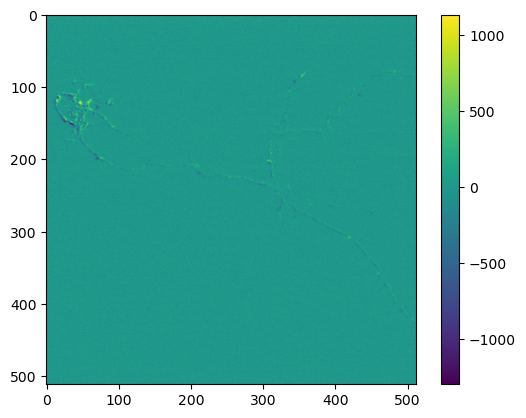

In [50]:
import matplotlib.pyplot as plt
plt.imshow(corrected_stack[-1]-corrected_stack[0]); plt.colorbar();

In [34]:
phase_cross_correlation(stack[-1], stack[0])

(array([-3.,  2.]), 1.0, -1.5219245854983193e-17)